# Michelle flow through experiment

1e-6 total Cu
1e-5 EN
pH 10

"1e-6 Cu Flow through.xlsx"

In [161]:
% housekeeping
% clear data and number format
clear; format short e
% turn off warnings
warning off
graphics_toolkit ("notebook"); 
%graphics_toolkit ("plotly"); 
% setup environment
% set path to equilibrium solver
txt=pwd;
n=length(txt);
rootpath=txt(1:n-5);
PHREEQCpath=[rootpath,'/runPHREEQC'];
addpath(PHREEQCpath);
JEQUILIBpath=[rootpath,'/JEQUILIB']; addpath(JEQUILIBpath);
Cumodelspath=[rootpath,'/Cutableaus']; addpath(Cumodelspath);

In [162]:
% put in constants
VT=0.05; %total volume
stockCuconc=0.0133; %M
ENT=1e-5;

In [163]:
% put in data

originalsamplemVnpH=[...
%pH mV
10.063  -223.1
10.115  -223.6
10.151  -223.4
];

calibdata=[...
%volCu mV pH
0 112.4  2.101
50 114.1 2.060
100 115.3 2.029
250 118.7 2.016
500 123.5 2.005
1000 127.8 1.997
];


pH = 1.0110e+01


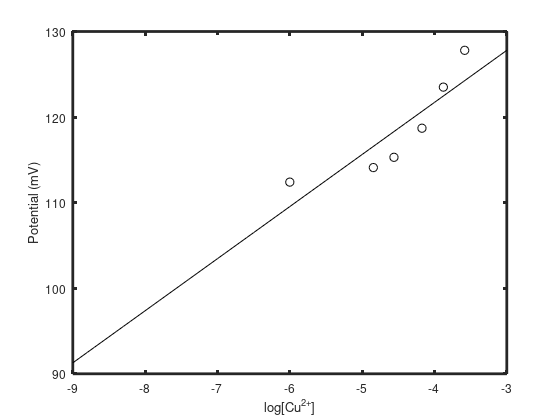

param,1,2
1,6.08674,146.061


In [164]:
graphics_toolkit("notebook")
% pull out the sample data
pH=mean(originalsamplemVnpH(:,1))
mVoriginal=(originalsamplemVnpH(:,2));

%pull out the calibration data
addedCuvol=calibdata(:,1)'*1e-6; pHcalib=calibdata(:,3); mV=calibdata(:,2)'; 
CuTmeas=1e-6; % not actually known until it is measured 
CuT=CuTmeas; CuTplus=(CuTmeas*(VT)+addedCuvol*stockCuconc)./(VT+addedCuvol);

plot(log10(CuTplus),mV,'ko'); hold on

%chlorocorrecxtion
%BF1=2.49; BF2=1.14; BF3=0.9; ClT=4.9904e-4; %from Inorg. Chem. 1983. 22. 3323-3326.
%CuTplus=CuTplus./(1+BF1*ClT+BF2*ClT^2+BF3*ClT^3);

param=polyfit([log10(CuTplus)],[mV],1)
m=param(1); Eo=param(2); logCuplot=-9:0.1:-3;
val=polyval(param,logCuplot);
plot(logCuplot,val,'k-');
xlabel('log[Cu^{2+}]');  ylabel('mV');
set(gca,'fontsize',12); set(gca,'linewidth',2);
xlabel('log[Cu^{2+}]'); ylabel('Potential (mV)')


logCuoriginal,1
1,-60.6501
2,-60.7322
3,-60.6994


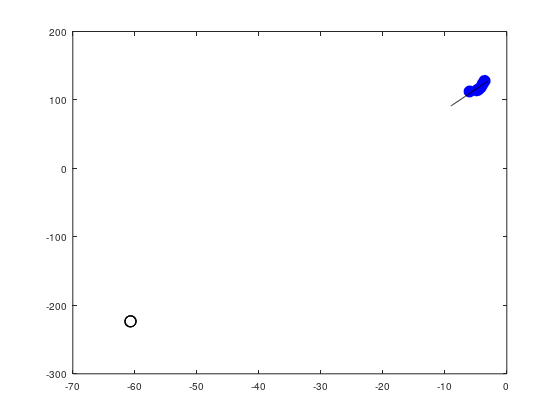

In [165]:
% then use this metacalibration to determine original sample logCu2+

logCuoriginal=(mVoriginal-Eo)/m

plot(log10(CuTplus),mV,'bo','markersize',8,'markerfacecolor','b'); hold on
plot(logCuplot,val,'k-')
plot(logCuoriginal,mVoriginal,'ko','markersize',8)

Cuall = 1.0804e-15


CuOH = 4.1964e-13


CuOH2s =          0


CuOs =          0


CuCO3s =          0


tenorite =          0


malachite =          0


MASSERR = 4.0234e-21


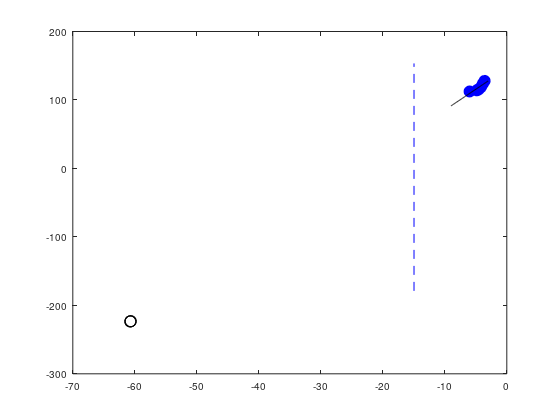

In [167]:
% MODEL FOR COMPARISON
graphics_toolkit("notebook")
%model with just inorganic speciation
%geochemical model
% input the constants and solution chemistry

flag1=2; %flag1 for concentration based search vector (1) or for log based search vector (2).
flag2=1; %flag2 for numerical derivatives (2) or analtyical derivatives (1)
database=[]; 
flag3=0; % flag3 1 for show warnings. 0 no warnings
flag4=0; %if=1 solve tableau one line at a time to get a good initial guess (no solids). really challenging probs only
flag5=0; %if=1 use stored initial guess for including solids

CuT=CuTmeas; inorganicTOTALS=[CuT ENT];
inorganicTOTALS(inorganicTOTALS==0)=1e-16; % get rid of zero values, b/c div by zero error
TOTALS=[inorganicTOTALS]; %TOTALS=inorganicTOTALS;
pH=pH; pe=20.75-pH; PCO2=10^-3.5;
[Cuall,CuOH,CuOH2s,CuOs,CuCO3s,tenorite,malachite,MASSERR]=CuOHCO2open_EN_allsolids(pH,pe,PCO2,TOTALS',flag1,flag2,flag3,flag4,flag5,database)

plot(log10(CuTplus),mV,'bo','markersize',8,'markerfacecolor','b'); 
hold on
plot(logCuplot,val,'k-')
plot(logCuoriginal,mVoriginal,'ko','markersize',8)

plot([log10(Cuall) log10(Cuall)],[min(mVoriginal)-0.2*min(mVoriginal) max(mV)+0.2*max(mV)],'b--')